In [66]:
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage import draw
from skimage import io
from skimage.util import crop

In [67]:
random.seed(42)

In [68]:
img = io.imread('../../ACE/ImageNet/ILSVRC2012_img_train/n01531178/n01531178_278.JPEG')

io.imsave('../images/reference_image.jpg',img)

In [69]:
height, width, _ = img.shape
R = 100 # Radius
previous_heights = []
previous_widths = []

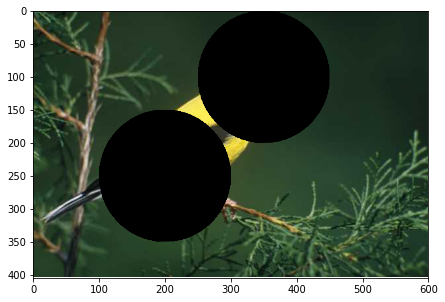

In [70]:
# Classified as "loudspeaker"
mask1 = draw.circle(100, 350, R)
mask2 = draw.circle(250, 200, R)

fig, ax = plt.subplots()
ax.imshow(img)
ax.plot(mask1[1], mask1[0], 'black', lw=1)
ax.plot(mask2[1], mask2[0], 'black', lw=1)
# ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

fig.tight_layout(pad=0.01)
plt.savefig(f'../images/test_mask_custom.jpg')
plt.show()

In [71]:
# Steps
# * Crop seperate elements of image and black of surrounding, save orignal coords
# * Create black canvas of same size of original image
# * Add cropped elements to canvas

In [72]:
img.shape

(405, 600, 3)

In [73]:
# crop(img, ((above,below),(left,right),(<channel>)))

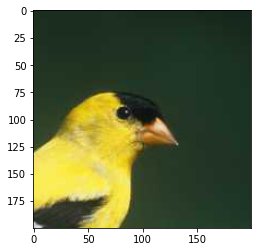

In [134]:
# image = np.random.random((405, 600))

# canvas = np.zeros(image.shape, dtype=bool)


# # cropped_img1 = crop(img, ((0,205),(250,150),(0,0)))
# # cropped_img2 = crop(img, ((150,55),(100,300),(0,0)))

# fig, ax = plt.subplots()
# # ax.imshow(img)
# ax.set_xticks([]), ax.set_yticks([])
# ax.axis([0, 600, 405, 0])
# ax.plot(50, 350, cropped_img1)
# ax.plot(250, 200, cropped_img2)

# cropped_img = crop(img, ((150,55),(100,300),(0,0)))
cropped_img = crop(img, ((0,205),(250,150),(0,0)))
plt.imshow(cropped_img)

In [76]:
img.shape

(405, 600, 3)

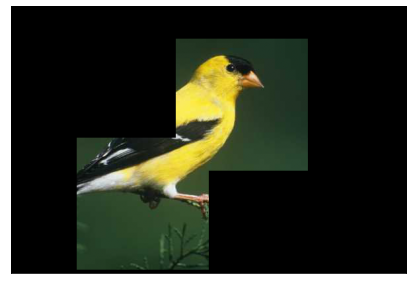

In [143]:
# Input image
image = io.imread('../../ACE/ImageNet/ILSVRC2012_img_train/n01531178/n01531178_278.JPEG') / 255.

background_height, background_width, background_depth = image.shape
background = np.zeros((background_height, background_width, background_depth))

# Find cropped image
# Get x, y coords
# Update background image

# crop(img, ((above,below),(left,right),(<channel>)))

R = 100

xcoords = [100, 250]
ycoords = [200, 50]

def plot_image_features(x, y, R, background):
    pass

for x, y in zip(xcoords, ycoords):

    cropped_image = crop(image, ((y,(background_height - y - 2*R)),(x,(background_width - x - 2*R)),(0,0)))    
    cropped_image_height, cropped_image_width, cropped_image_depth = cropped_image.shape

    background[y : y + cropped_image_height, x : x + cropped_image_width, :] = cropped_image
    background = background[:,:,:3] * (1. - background) + background[:,:,:3] * background

fig, ax = plt.subplots()
ax.imshow(background)
fig.tight_layout(pad=0.01)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, background.shape[1], background.shape[0], 0])
plt.savefig(f'../images/test_combined_features.jpg')
plt.show()


In [42]:
y0, x0 = cropped_img.shape[:2]
y0, x0 = y0/2, x0/2
R = 100

In [44]:
rr, cc = draw.circle(y0, x0, R, shape=cropped_img.shape)

array([  1,   1,   1, ..., 199, 199, 199])

In [50]:
l = [1,2,3,4]

for x in range(len(l)):
    print(x)

0
1
2
3


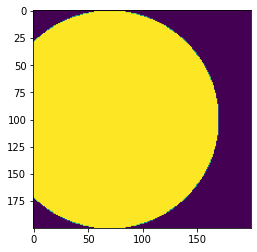

In [85]:
image = np.random.random((200, 200))
# image = np.random.random((200, 200, 3))

# --- coordinate specification

r0, c0 = 100, 70  # circle center (row, column)
R = 100  # circle radius

theta0 = np.deg2rad(20)  # angle #1 for arc
theta1 = np.deg2rad(40)  # angle #2 for arc

# Above, I provide two angles, but you can also just give the two
# coordinates below directly

r1, c1 = r0 - 1.5 * R * np.sin(theta0), c0 + 1.5 * R * np.cos(theta0)  # arc coord #1
r2, c2 = r0 - 1.5 * R * np.sin(theta1), c0 + 1.5 * R * np.cos(theta1)  # arc coord #2

# --- mask calculation

mask_circle = np.zeros(image.shape, dtype=bool)
mask_poly = np.zeros(image.shape[:2], dtype=bool)

rr, cc = draw.circle(r0, c0, R, shape=mask_circle.shape)
mask_circle[rr, cc] = 1
# mask_circle[rr, cc][0] = 1
# mask_circle[rr, cc][1] = 0
# mask_circle[rr, cc][2] = 0

# rr, cc = draw.polygon([r0, r1, r2, r0],
#                       [c0, c1, c2, c0], shape=mask_poly.shape)
# mask_poly[rr, cc] = 1

# mask = mask_circle & mask_poly
# mask = mask_poly
mask = mask_circle

plt.imshow(mask)
plt.show()

In [75]:
np.random.random((200, 200,3))[100, 100]

array([0.57228797, 0.58581307, 0.46711833])

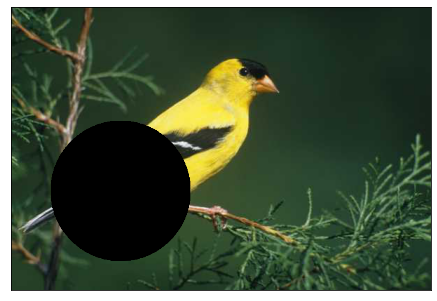

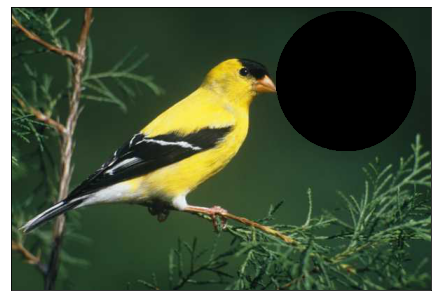

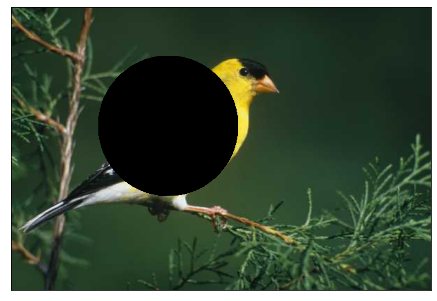

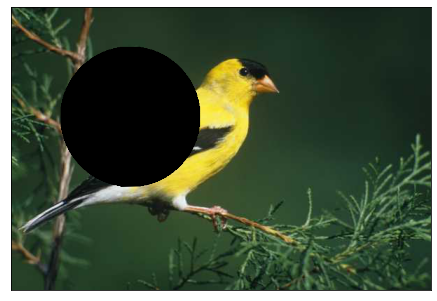

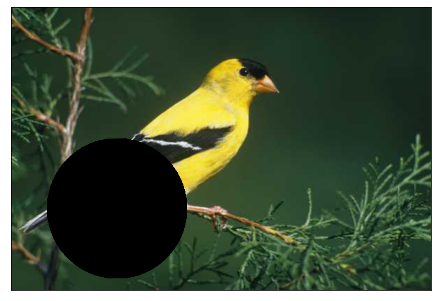

In [32]:
def get_mask_coords():
    
    mask_height = random.randint(R,height-R)
    mask_width = random.randint(R,width-R)

    if mask_height in previous_heights or mask_width in previous_widths:
        get_mask_coords()
    else:
        previous_heights.append(previous_heights)
        previous_widths.append(mask_width)
        return mask_height, mask_width

for i in range(1000):
    try:
        mask_height, mask_width = get_mask_coords()
    except TypeError:
        break

    mask = draw.circle(mask_height, mask_width, R)

    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.plot(mask[1], mask[0], 'black', lw=1)
    ax.set_xticks([]), ax.set_yticks([])
    ax.axis([0, img.shape[1], img.shape[0], 0])

    fig.tight_layout(pad=0.05)
    plt.savefig(f'../images/test_mask_{i}.jpg')
    plt.show()